## 1. Write python code to give the length of the longest common subsequence for two strings.

In [19]:
def len_lcs(x, y): # Inspired by the pseudocode from Introduction to Algorithms, Cormen et al.
    """Returns the length of the two strings"""
    
    # Protection against bad inputs
    if type(x) != str or type(y) != str:
        raise TypeError('Inputs must be strings')
    
    # Length of the two strings, used as array dimensions
    m = len(x)
    n = len(y)
    
    # Setting up the array of size (m+1)(n+1)
    c = [[0 for x in range(n + 1)] for y in range(m + 1)]
    for i in range(m):  # Iterate from x[0] -> x[m - 1]
        for j in range(n):  # Iterate from y[0] -> y[n - 1]
            # If the last elements of the strings are the same
            if x[i] == y[j]:  
                c[i + 1][j + 1] = c[i][j] + 1
            
             # If the last elements of the strings are different, case 1
            elif c[i][j + 1] >= c[i + 1][j]:
                c[i + 1][j + 1] = c[i][j + 1]
            else:  # Case 2
                c[i + 1][j + 1] = c[i + 1][j]
    return c[m][n]  # Return the length of the LCS of the two full strings

## 2. Generate the table of the lengths of the longest common subsequences for every pair of strings.

In [20]:
# The list of genes
str1 = 'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'
str2 = 'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA'
str3 = 'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA'
str4 = 'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA'
str5 = 'CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA'
str6 = 'CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC'
str7 = 'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'
genes = [str1, str2, str3, str4, str5, str6, str7]


def print_table(lst):
    data = []
    data.append(['Gene', 1,2,3,4,5,6,7])
    for i in range(len(lst)):
        result_lst = []
        for j in range(len(lst)):
            result_lst.append(len_lcs(lst[i], lst[j]))
        result_lst.insert(0, i + 1)
        data.append(result_lst)
    lens = [max(len(str(col)) for col in row) for row in data]
    for row in zip(*data):
        print('{:>{lens[0]}} {:>{lens[1]}} {:>{lens[2]}} {:>{lens[3]}} {:>{lens[4]}} {:>{lens[5]}} {:>{lens[6]}} {:>{lens[7]}}'.format(*row, lens=lens))


print_table(genes)

Gene   1  2  3  4  5   6   7
   1 100 74 76 73 82  84  91
   2  74 90 67 72 80  70  71
   3  76 67 97 65 69  81  84
   4  73 72 65 96 81  71  69
   5  82 80 69 81 96  74  75
   6  84 70 81 71 74 111  97
   7  91 71 84 69 75  97 104


## 3. Manually examine the table, and infer the relationships between strings.

My approach is to examine each row in the table (first row/column represents the first gene) and find the largest value in the row. My assumption is that this LCS value tells us which other gene is the current gene most closely related to. I take note of this association for row as I progress through the rows. The results are:

- Gene 1 - Gene 7: 91
- Gene 2 - Gene 5: 80
- Gene 3 - Gene 7: 84
- Gene 4 - Gene 5: 81
- Gene 5 - Gene 1: 82
- Gene 6 - Gene 7: 97
- Gene 7 - Gene 6: 97

From these associations, only when Gene 1 is treated as the "root" of the binary tree resulted from the gene mutations can we get a complete binary tree. The tree would look like the following illustration:

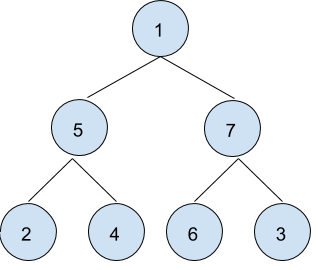

In [21]:
from IPython.display import Image
filename = "Binary Tree.png"
Image(filename)

## 4. How would you estimate the probabilities of mutation, insertions and deletions? (There might not be enough data to give meaningful estimates, but at least have a clear idea of the approach.)

### Assumptions:
- Mutations happen optimally. That is, for a gene X to turn into a gene Y, a minimum total of insertions, deletions, and substitutions are used. This assumption is made for the sake of simplifying the problem.
- Mutations happen independently. Knowing that a mutation happens does not tell us anything about whether another mutation will or will not happen.
- The probability of mutation is the same with every gene and its offsprings. Each element in gene X has a certain probability for mutation and each element in the offsprings of gene X has the same probability.
- The parent-child relationships of the genes are known before the calculations of the probabilities, and mutations only occur between parent-child pairs outline by the known relationships.

### Explanation of approach:

With these assumptions, I will calculate the minimum number of edits (insertions, deletions, and substitutions) required to turn one gene into another, noting the exact number of insertions, deletions, and substitutions. In this case, I will do this for six pairs of genes based on the relationships found in part 3: (1 - 5), (1 - 7), (5 - 2), (5 - 4), (7 - 6), and (7 - 3). For each pair, I will divide the number of insertions, deletions, and substitutions by the total number of mutations to get the probability of insertions, deletions, and substitutions, respectively, **if** a mutation in general happens. Finally, I will average the results of six pairs to get three final probabilities for insertions, deletions, and substitutions.

This approach does not estimate the probability of a mutation happening in general; it only estimates the probability of an insertion, deletion, or substitution happening under the condition that a mutation occurs. As the prompt indicated, these seven genes might not give meaningful estimates, but if this approach is applied, then the result will be the following conditional probabilities (results are in the cell below).

In [22]:
# The list of genes
str1 = 'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'
str2 = 'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA'
str3 = 'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA'
str4 = 'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA'
str5 = 'CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA'
str6 = 'CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC'
str7 = 'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'
genes = [str1, str2, str3, str4, str5, str6, str7]


# Implementation and results:
def edit_dist(x, y):  # Inspired by the GeeksforGeeks' implementation.
    """Returns the minimum number of insertions, 
        deletions, and substitions needed to turn x -> y"""
    
    # Protection against bad inputs
    if type(x) != str or type(y) != str:
        raise TypeError('Inputs must be strings')
    
    # The lengths of the two strings, will be used as array dimensions
    m = len(x)
    n = len(y)
    
    # Initialize a table, similar to that of the LCS algorithm
    table = [[0 for b in range(n + 1)] for c in range(m + 1)]
    
    # The nested for-loop traverses the table
    for i in range(m + 1):
        for j in range(n + 1):
            # If x == null, the cost of x -> y is inserting every element of y
            if i == 0:
                table[i][j] = j
            
            # If y == null, the cost of x -> y is deleting every element of x
            elif j == 0:
                table[i][j] = i
            # If the last elements of x and y are equal,
            # the edit dist is that of table[i - 1][j - 1]
            elif x[i - 1] == y[j - 1]:
                table[i][j] = table[i - 1][j - 1]
            # If the last elements of x and y are different, 3 cases:
                # substituting an element from x
                # inserting an element from x
                # deleting an element from x
            # The minimum of the three is chosen
            else:
                table[i][j] = 1 + min(table[i - 1][j - 1],
                                  table[i][j - 1],
                                  table[i - 1][j])

            # 1 is added because we're making a new move

    # Initializing i and j that points to the bottom-right cell of 'table'
    i = m
    j = n
    ins = 0   # The number of insertions
    dels = 0  # The number of deletions
    subs = 0  # The number of substitutions
    
    # while loop retraces the path that the algorithm took to turn X into Y
    while i != 0 and j != 0:   
        if x[i - 1] == y[j - 1]:
            # Check if the elements of x and y in these indices are equal
            # If they are, then no edits are needed in those elements
            # i and j are decremented
            i -= 1
            j -= 1
        else:  # If the elements are different.
            # The edit distance value prior to making a change
            val = table[i][j] - 1
            
             # If the algorithm took the substitution route
            if val == table[i - 1][j - 1]: 
                subs += 1
                i -= 1
                j -= 1
            
            # If the algorithm took the insertion route
            elif val == table[i][j - 1]:  
                ins += 1
                j -= 1
            
            # The algorithm took the deletion route/ val == table[i - 1][j]
            else:  
                dels += 1
                i -= 1

    return ins, dels, subs


def prob():
    result_lst = [edit_dist(str1, str5), edit_dist(str1, str7),
                  edit_dist(str5, str2), edit_dist(str5, str4),
                  edit_dist(str7, str6), edit_dist(str7, str3)]
    prob_ins = []
    prob_dels = []
    prob_subs = []

    for i in result_lst:
        for j in range(len(i)):
            if j == 0:
                prob_ins.append(i[j]/sum(i))
            elif j == 1:
                prob_dels.append(i[j]/sum(i))
            else:
                prob_subs.append(i[j]/sum(i))
    avg_ins = sum(prob_ins)/len(prob_ins)
    avg_dels = sum(prob_dels)/len(prob_dels)
    avg_subs = sum(prob_subs)/len(prob_subs)

    print('The average probability of an insertion happening if a mutation happens is', avg_ins)
    print('The average probability of a deletion happening if a mutation happens is', avg_dels)
    print('The average probability of a substitution happening if a mutation happens is', avg_subs)

    
prob()

The average probability of an insertion happening if a mutation happens is 0.2792560647251722
The average probability of a deletion happening if a mutation happens is 0.3146860555327375
The average probability of a substitution happening if a mutation happens is 0.40605787974209023


## 5. Can you devise an algorithm in the general case which might be able to infer such a tree of relationships? Give any strengths or weaknesses of your suggested algorithm.

In [23]:
def rlts(lst=[]):
    """Returns the gene pairs in tuples, takes an list of genes (strings)"""
    
    # Will contain pairs of genes in tuples
    pairs = []
    
    # Nested loop traversing a 2D array
    for i in range(len(lst)):
        
        # Initiate a variable to hold the maximum LCS value
        max_lcs = 0
        
        # Initiate a variable to refer to the gene with which the current gene has the highest LCS
        match = None  
        for j in range(len(lst)):
            
            # Avoid comparing with itself
            if lst[i] == lst[j]:  
                continue
                
            # Uses the len_lcs function in part 1
            lcs = len_lcs(lst[i], lst[j])
            
            # Checks if the current LCS is the largest
            if lcs > max_lcs:
                max_lcs = lcs
                match = j
        
        # Appends the pair after going through a row in the table
        pairs.append((i + 1, match + 1))
        
        # To match the output with the illustration above, 
        #'i' and 'match' are incremented by 1 before being appended.
        # The relationships are still the same.

    return pairs  
    # Given these pairs, it is a possible to create a binary tree.
    # Interpretation of output: (x,y) = the xth gene in the order of the array 
    # given to the function is related to the yth gene in the same array.
    # Ex: (1, 7) = the 1st gene in the array is related to the 7th gene in the array.


print(rlts(genes))

[(1, 7), (2, 5), (3, 7), (4, 5), (5, 1), (6, 7), (7, 6)]


### Discussion

- Weakness:
    *  The algorithm works under the assumptions that the parent-child relationships of the genes are dictated by the lengths of the LCSs, as shown in the code, and that these relationships can be presented in a single binary tree (showing the relationships of the genes as a tree is not a part of this algorithm). If any of these assumptions are false, then the algorithm will not return the correct answer.
    *  The code is recalculating the same LCS twice, since len_lcs(gene1, gene2) is the same as len_lcs(gene2, gene1).

## 6. Describe the complexity of your solution to identify related “genes” for this assignment. (Let M be the length of a gene, and N be the number of genes.)

To generalize, let M be the length of the all the genes that are given to the algorithm (even though the lengths of the genes are not exactly equal in reality) and N be the number of genes.

### Time complexity:

The algorithm has two main components: the nested for-loop and the function len_lcs() (defined in part 1). len_lcs() runs in O(M x M) = O(M^2) time because it has to go through every cell in the 2D array that it creates. len_lcs() is called N x (N - 1) times because it is in the nested for-loop of rlts(). Therefore, rlts() runs in O(M^2 x N^2 - M^2 x N) = O(M^2 x N^2) time, where M is the length of a gene and N is total the number of genes.

### Space complexity:

The bulk of the space in rlts() is used for the matrix in len_lcs(). Even though len_lcs() will create a lot of matrices during the runtime of rlts(), these matrices are fortunately local to the function len_lcs(). This means that a matrix is created when len_lcs() is called and the same matrix is deleted when len_lcs() exits. Therefore, the space complexity of rlts() is O(M^2), which represents the size of the matrix created each time len_lcs() is called.

## HC's:

- #breakitdown: For the coding portion of part 4, I broke the problem into 3 parts: writing the code that calculates the edit distance, the code that retraces the steps that the algorithm took, and the code that calculates the probabilities.

## Citations:
- Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to Algorithms (3rd ed.)
- Edit Distance | DP-5. (2018, September 28). Retrieved December 11, 2018, from https://www.geeksforgeeks.org/edit-distance-dp-5/